In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
G1 = nx.Graph()

G1.add_edge("a", "b", weight=0.6)
G1.add_edge("a", "c", weight=0.4)
G1.add_edge("c", "d", weight=0.5)
G1.add_edge("c", "e", weight=0.7)
G1.add_edge("c", "f", weight=0.9)
G1.add_edge("a", "d", weight=0.55)

In [36]:
def draw_graph(G, draw_dashed_thresh=0.5, title_str=""):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > draw_dashed_thresh]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= draw_dashed_thresh]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.title(title_str)
    plt.tight_layout()
    plt.show()

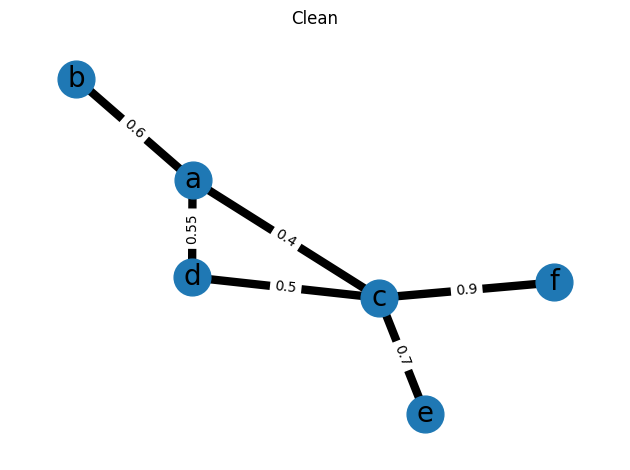

In [37]:
draw_graph(G1, 0.39, "Clean")

In [32]:
# make a splitter graph
G2 = nx.Graph()

G2.add_edge("a", "b", weight=0.6)
G2.add_edge("a", "f1", weight=0.3)
G2.add_edge("a", "f2", weight=0.3)
G2.add_edge("a", "c", weight=0.4)
G2.add_edge("c", "d", weight=0.5)
G2.add_edge("c", "e", weight=0.7)
G2.add_edge("c", "f", weight=0.9)
G2.add_edge("a", "d", weight=0.55)

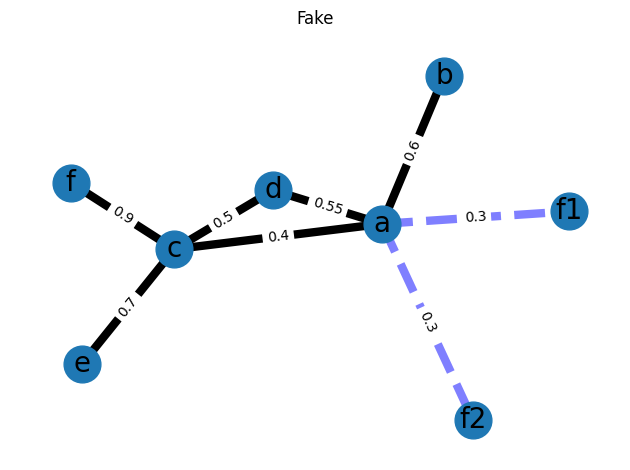

In [39]:
draw_graph(G2, 0.39, "Fake")

In [34]:
nx.eigenvector_centrality(
    G1, max_iter=1000, tol=1e-06, nstart=None, weight="weight"
)

{'a': 0.3913834426440414,
 'b': 0.16341988875750277,
 'c': 0.6459002748842987,
 'd': 0.37454235541380243,
 'e': 0.314637107021012,
 'f': 0.40453342330826064}

In [35]:
nx.eigenvector_centrality(
    G2, max_iter=1000, tol=1e-06, nstart=None, weight="weight"
)

{'a': 0.4209371690300407,
 'b': 0.17328539575637747,
 'f1': 0.08664269787834812,
 'f2': 0.08664269787834812,
 'c': 0.6288554322104029,
 'd': 0.37457479948891137,
 'e': 0.30202179473073976,
 'f': 0.38831373608228864}